#### <strong>第一次作品：主成分分析應用於群組資料之探討</strong>
學號：711333104

姓名：林子齊
<hr>

 <font color=skyblue>作品目標</font>：透過主成分分析（PCA），對一組多維度資料進行降維與視覺化，以探索其內在結構、變數關聯性及可能的群組特徵。使用數據視覺化技術分析變數之間的關係，評估標準化對分析結果的影響，並透過降維後的投影觀察數據的潛在分佈模式。
 <hr>

第 1 題：

有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

(1)觀察資料

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the wine dataset from sklearn
X, y = load_wine(return_X_y=True, as_frame=True)
labels = X.columns
# print sample size and number of features
print(f"Sample size: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
# print the number of classes
print(f"Number of classes: {len(np.unique(y))}")
# print the number of samples per class
print(f"Number of samples per class: {np.bincount(y)}")
# print number of missing values
print(f"Number of missing values: {X.isnull().sum().sum()}")
X.head()
# X.info()
# X.describe()

Sample size: 178
Number of features: 13
Number of classes: 3
Number of samples per class: [59 71 48]
Number of missing values: 0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<hr>

(2)繪製變數間的相關係數圖，以觀察變數間是否存在相關性

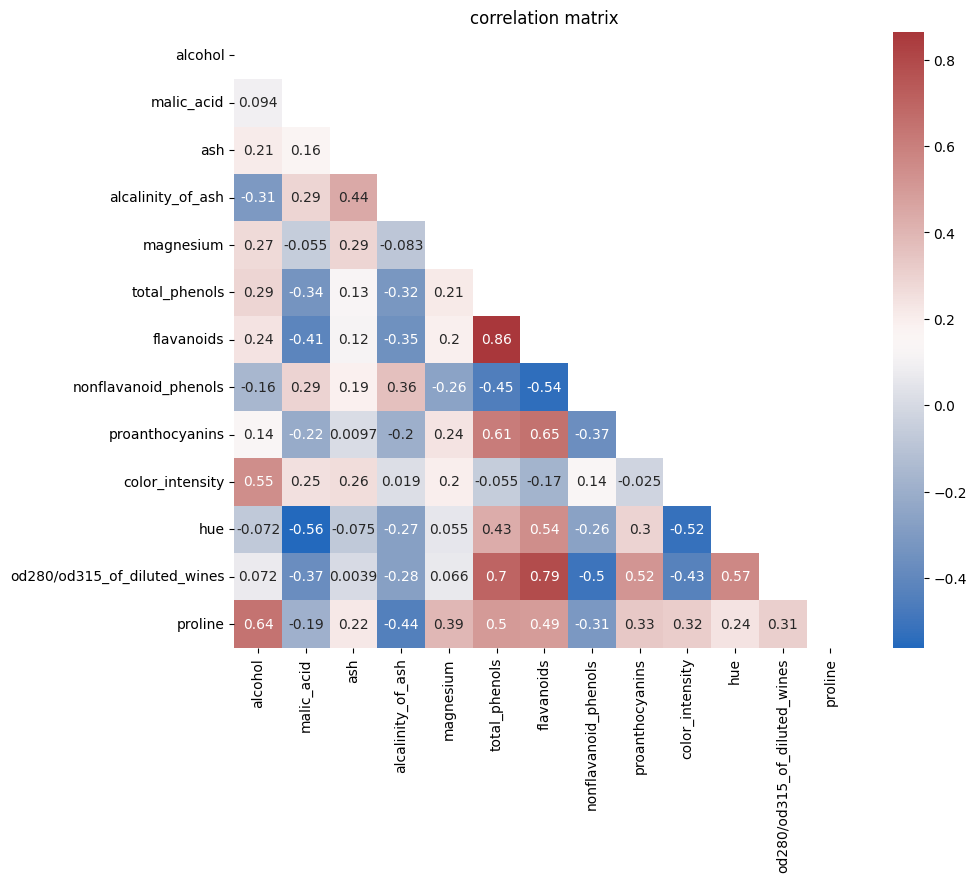

In [3]:

# 計算相關係數
corr_matrix = X.corr()

# 只顯示一半的矩陣
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 繪製熱圖
plt.figure(figsize=(10, 8))  # 設定圖的大小
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="vlag")

# 設定標題
plt.title("correlation matrix")
plt.show()


相關係數為對稱矩陣，所以只須呈現一半即可。\
會發現變數 flavanoids 、 total_phenols 和 od280 之間有高相關性。\
變數 ash 與大多變數呈低相關性。

<hr>

(3)繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

In [4]:
scaler = StandardScaler() # create a StandardScaler object
X_std = scaler.fit_transform(X) # standardize the data
# X_std = pd.DataFrame(X_std, columns=X.columns) # convert the array to a DataFrame
# X_std.head()

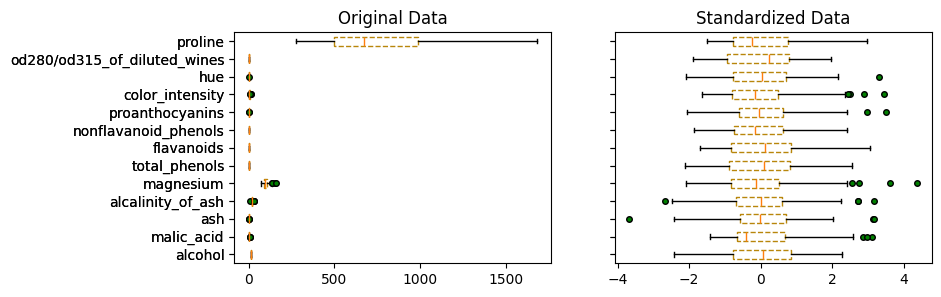

In [5]:
labels = X.columns
fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey = True)
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 4, linestyle = 'none') 

#share the same y-axis
ax[0].boxplot(X, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = labels, vert = False)
ax[0].set_title('Original Data')

ax[1].boxplot(X_std, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = labels, vert = False)
ax[1].set_title('Standardized Data')
plt.show()

因為變數間的尺度差異太大，所以要做標準化。如果不標準化，數值較大的變數可能會主導模型，影響結果的準確性。

<hr>

(4)進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

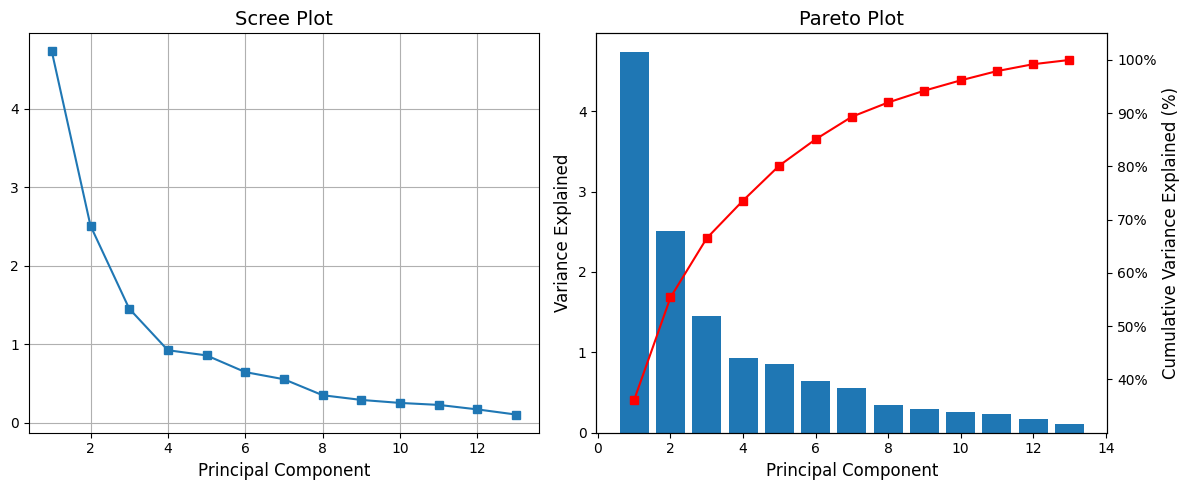

In [6]:
# 執行 PCA
pca = PCA()
pca.fit(X_std)

# 取得特徵值（Eigenvalues）與累積解釋變異量
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)  # 累積變異量

# 設定畫布
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

### **Scree Plot（碎石圖）**
ax[0].plot(range(1, len(eigenvalues) + 1), eigenvalues,  marker="s", linestyle="-", color="tab:blue")
ax[0].set_xlabel("Principal Component", fontsize=12)
#ax[0].set_ylabel("Eigenvalue", fontsize=12)
ax[0].set_title("Scree Plot", fontsize=14)
ax[0].grid(True)

### **Pareto Plot（帕累托圖）**
ax1 = ax[1]
ax1.bar(range(1, len(eigenvalues) + 1), eigenvalues, color="tab:blue", label="Variance Explained")
ax1.set_xlabel("Principal Component", fontsize=12)
ax1.set_ylabel("Variance Explained", fontsize=12)
ax1.set_title("Pareto Plot", fontsize=14)

# 添加第二 y 軸（累積變異量）
ax2 = ax1.twinx()
ax2.plot(range(1, len(eigenvalues) + 1), cumulative_variance * 100, marker="s", linestyle="-", color="red", label="Cumulative Variance Explained")
ax2.set_ylabel("Cumulative Variance Explained (%)", fontsize=12)
ax2.set_ylim(30, 105)  # **設定 y 軸範圍**
ax2.set_yticks(np.arange(40, 110, 10))  # **設定 40%, 50%, 60%, ..., 100%**
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}%"))  # **加上 "%" 符號**

# 顯示圖表
plt.tight_layout()
plt.show()

主成分選擇依據 Scree Plot & Pareto Plot

1. 從 Scree Plot 觀察到，在第 3 或 4 個主成分後，特徵值的下降趨勢趨於平緩，這表示後續主成分對總變異的額外貢獻較小，依據肘部法則（Elbow Method），可考慮選擇前 2 到 3 個主成分。
2. 在 Pareto Plot 上，前 2 到 3 個主成分的累積解釋變異數約為 55% 和 65%，顯示這些主成分能夠保留相當比例的原始數據資訊，具備一定的解釋能力。

基於累積解釋變異數的主成分選擇

1. 從 Pareto Plot 來看，可以根據 累積解釋變異數設定一個閾值（如 80% 以上），以確保所選主成分保留足夠資訊量。
2. 如果設定累積解釋變異數 ≥ 80%，則可選擇前 6 個主成分，因為它們共同解釋了數據的大部分變異。

<hr>

(5)資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。如圖四（左）。是否可以從兩個主成分的散布圖中看出三個群組？

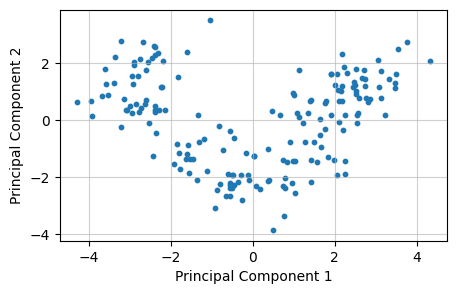

In [7]:
pca = PCA(n_components=2) # create a PCA object with 2 components
# pac = pca.fit(X)
# Z = pca.transform(X)
pca.fit(X_std)
Z = pca.transform(X_std)
# X_pca = pca.fit_transform(X_std)
eigenvalues = pca.explained_variance_
Z.shape
# draw a scater plot of the first two principal components
plt.figure(figsize=(5, 3))
plt.scatter(Z[:, 0], Z[:, 1], s=10, color='tab:blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle="-", alpha=0.6)  # 增加網格線
# plt.colorbar()
plt.show()

有標準化的話，從這張圖能看出大概有三個群組。

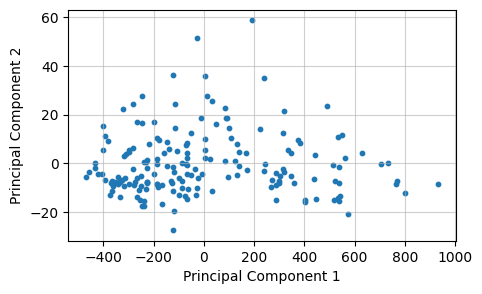

In [8]:
pca = PCA(n_components=2) # create a PCA object with 2 components
pca.fit(X)  # 直接對原始數據 X 進行 PCA
Z = pca.transform(X)  # 取得主成分投影

# 取得特徵值（解釋變異數）
eigenvalues = pca.explained_variance_

# 繪製散點圖
plt.figure(figsize=(5, 3))
plt.scatter(Z[:, 0], Z[:, 1], s=10, color='tab:blue')  
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle="-", alpha=0.6)  # 增加網格線
plt.show()

若無標準化，就看不出有分群。

<hr>

(6)再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色

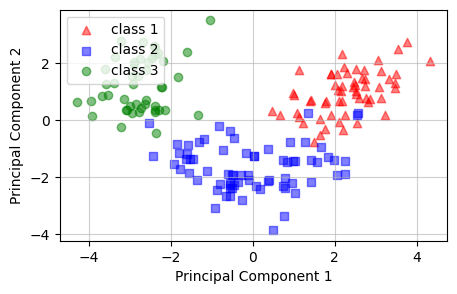

In [9]:
pca = PCA(n_components=2)
pca.fit(X_std)
Z = pca.transform(X_std)

# 定義不同類別的標記與顏色
colors = ['red', 'blue', 'green']
markers = ['^', 's', 'o']  # 三角形, 方形, 圓形
labels = ['class 1', 'class 2', 'class 3']

# 繪製散布圖
plt.figure(figsize=(5, 3))
for i, label in enumerate(np.unique(y)):  
    plt.scatter(Z[y == label, 0], Z[y == label, 1], 
                color=colors[i], marker=markers[i], 
                label=labels[i], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 加入圖例
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle="-", alpha=0.6)  # 增加網格線
# plt.colorbar()
plt.show()

會發現，上了標記之後，能更明顯的看出有三個群組。跟沒上標記圖的觀察大致相同。

<hr>

(7)如果採三個主成分，則可繪製如圖五與圖六的立體圖。觀察圖五、六是否比圖四（右）具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

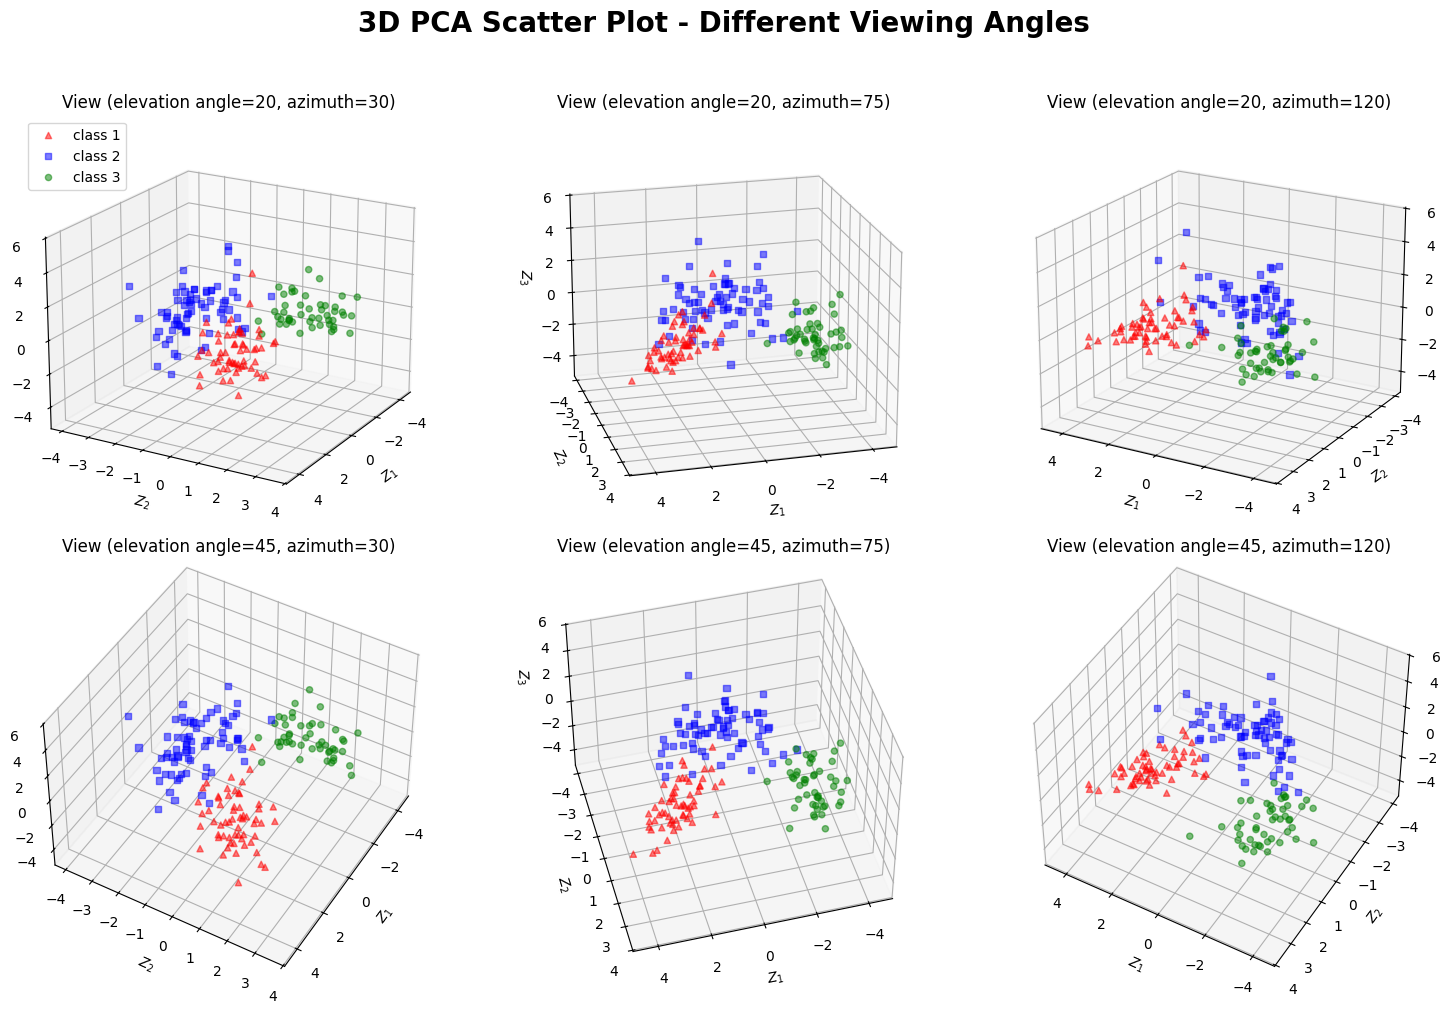

In [10]:
# 執行 PCA
pca = PCA(n_components=3)
pca.fit(X_std)
Z = pca.transform(X_std)

# 設定 6 種不同的視角
view_angles = [
    (20, 30),
    (20, 75),
    (20, 120),
    (45, 30),
    (45, 75),
    (45, 120)
]

# 建立 2x3 子圖
fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={"projection": "3d"})

# 設定大標題
fig.suptitle('3D PCA Scatter Plot - Different Viewing Angles', fontsize=20, fontweight='bold')

# 遍歷所有子圖 (axes.flat 讓 2x3 的子圖變成一維陣列) 並與視角 (elev, azim) 配對
for ax, (elev, azim) in zip(axes.flat, view_angles):
    # 遍歷數據集中所有不同的類別 (標籤 y)
    for i, label in enumerate(np.unique(y)):  
        ax.scatter(Z[y == label, 0], Z[y == label, 1], Z[y == label, 2], 
                   c=colors[i], marker=markers[i], 
                   label=labels[i], alpha=0.5)
    
    ax.set_xlabel(r'$Z_1$', fontsize=10)
    ax.set_ylabel(r'$Z_2$', fontsize=10)
    ax.set_zlabel(r'$Z_3$', fontsize=10)
    ax.set_title(f'View (elevation angle={elev}, azimuth={azim})', fontsize=12)
    
    # 設定不同角度
    ax.view_init(elev=elev, azim=azim)

# **只在第一個子圖加圖例**
axes.flat[0].legend(loc='upper left', fontsize=10)

# 調整圖形間距，避免標題與子圖重疊
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 讓 suptitle 有足夠空間
plt.show()

選取前三個主成分進行繪圖，並從六個不同角度觀察其分群效果。然而，與僅使用前兩個主成分的投影圖相比，分群效果並未顯著提升。

<hr>

(8) $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數（即前兩個 eigenvector 的值），看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。先不管理論怎麼說，就只是談談你的觀察與猜測。

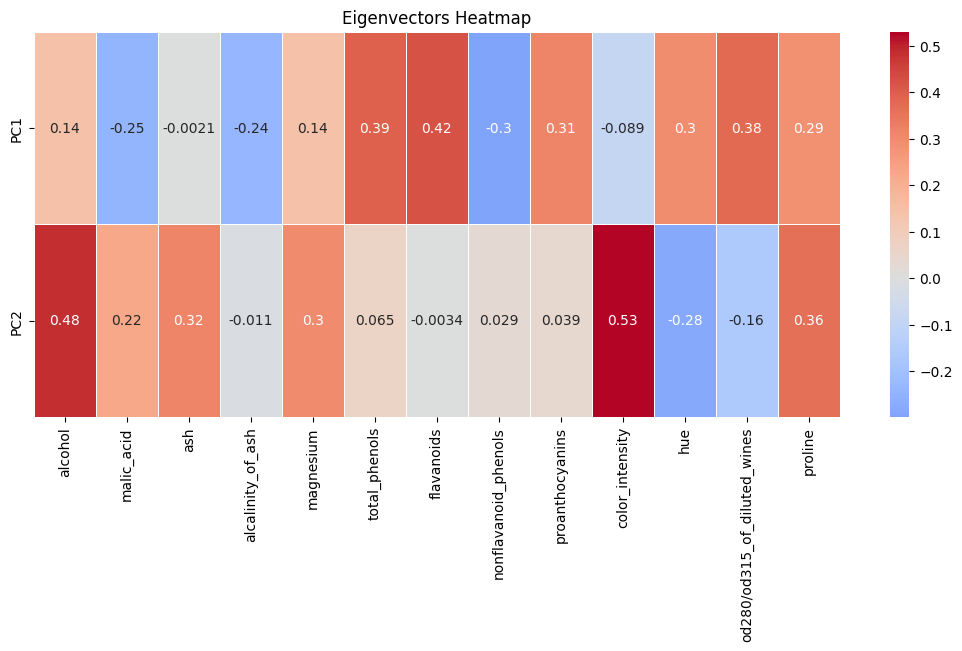

In [11]:
pca = PCA(n_components=2)
pca.fit(X_std)
Z = pca.transform(X_std)

# 取得前兩個主成分的 eigenvectors (loading matrix)
loadings = pca.components_  # shape: (2, n_features)

# 建立變數名稱
pc_names = [f"PC{i+1}" for i in range(loadings.shape[0])]

# 轉成 DataFrame 方便畫圖
loading_df = pd.DataFrame(loadings, index=pc_names, columns=X.columns)

# 畫出 heatmap
plt.figure(figsize=(13, 5))
sns.heatmap(loading_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Eigenvectors Heatmap")
plt.show()

由該圖中，可以發現:
1. flavanoids 、 total_phenols 和 od280 對 PC1 具有較高的重要性，而 ash 對 PC1 的影響較小。\
表示 PC1 可能代表「多酚含量與抗氧化特性」維度。
2. color_intensity 和 alcohol 對 PC2 具有較高的重要性，而 flavanoids 對 PC2 的影響較小。\
表示 PC2 可能代表「酒體濃郁度與酒精含量」維度。

在原變數的相關係數圖中，flavanoids 、 total_phenols 和 od280 之間的相關性較高，color_intensity 和 alcohol 之間的相關性也較高，而 ash 與大多數其他變數的相關性較低，因此其所包含的資訊較為獨立。

以上證實 Eigenvectors Heatmap 與原變數間的相關係數圖透露相同的訊息，確實能找出數據的主要變異方向。

<hr>
<hr>

第二題：
回答類似習題 1 的問題（如下所述），資料來自 NUMBEO 的 Quality of Life Index by City 2025 （下載 2025_city_quality.xlsx）關於世界 263 個城市的生活品質排名，其中包含 8 個指標數字。在此可以將排名資料置換成代表生活品質的「標籤 labels」，譬如總分數（欄位 Quality of Life Index）200 分以上稱為「高品質」或「HIGH」，並配與數字 2；分數 100 ~200 稱為「中品質」或「MEDIUM」，並配與數字 1；總分 100 以下稱為「低品質」或「LOW」，並配與數字 0。當然這種分組方式可以自訂，譬如分四組或五組，再看看進行 PCA 後的表現。

(1)觀察資料

In [12]:
# 讀取 Excel 檔案
file_path = "Data/2025_city_quality.xlsx"  # 請確保檔案名稱正確
df = pd.read_excel(file_path)

# 查看前幾筆資料
df.head()

,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,"The Hague (Den Haag), Netherlands",229.0,151.8,79.5,80.7,58.3,5.7,21.0,17.9,90.6
1,2,"Groningen, Netherlands",225.9,153.5,78.1,76.4,54.5,5.0,20.1,18.8,83.5
2,3,"Luxembourg, Luxembourg",219.9,174.4,71.3,76.3,66.0,8.8,27.5,21.6,82.6
3,4,"Eindhoven, Netherlands",218.3,140.6,78.4,79.0,59.9,6.4,24.0,19.2,85.4
4,5,"Basel, Switzerland",217.0,182.4,72.9,71.6,98.0,8.5,27.6,24.9,82.8


In [13]:
# 假設 df 是你的 DataFrame
def transform_quality(score):
    if score > 200:
        return 2
    elif 100 <= score <= 200:
        return 1
    else:
        return 0

# 直接替換 'Quality of Life Index' 欄位的數值
df['Quality of Life Index'] = df['Quality of Life Index'].apply(transform_quality)


df = df.iloc[:, 2:]  # 刪除前兩欄
df.head()

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,2,151.8,79.5,80.7,58.3,5.7,21.0,17.9,90.6
1,2,153.5,78.1,76.4,54.5,5.0,20.1,18.8,83.5
2,2,174.4,71.3,76.3,66.0,8.8,27.5,21.6,82.6
3,2,140.6,78.4,79.0,59.9,6.4,24.0,19.2,85.4
4,2,182.4,72.9,71.6,98.0,8.5,27.6,24.9,82.8


移除了 rank 和 city 欄位，因為這些資訊對於後續分析並無直接影響，並把 Quality of Life Index 置換成生活品質的標籤。\
\
生活品質的標籤設定:
1. 總分數（欄位 Quality of Life Index）200 分以上稱為「HIGH」，並配與數字 2。
2. 總分 100 ~ 200 稱為「MEDIUM」，並配與數字 1。
3. 總分 100 以下稱為「LOW」，並配與數字 0。

In [14]:
y1 = df.iloc[:, 0].values 
X1 = df.iloc[:, 1:]
labels = X1.columns
# print sample size and number of features
print(f"Sample size: {X1.shape[0]}")
print(f"Number of features: {X1.shape[1]}")
# print the number of classes
print(f"Number of classes: {len(np.unique(y1))}")
# print the number of samples per class
print(f"Number of samples per class: {np.bincount(y1)}")
# print number of missing values
print(f"Number of missing values: {X1.isnull().sum().sum()}")
X1.head()
# X.info()
# X.describe()

Sample size: 263
Number of features: 8
Number of classes: 3
Number of samples per class: [ 30 214  19]
Number of missing values: 0


,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,151.8,79.5,80.7,58.3,5.7,21.0,17.9,90.6
1,153.5,78.1,76.4,54.5,5.0,20.1,18.8,83.5
2,174.4,71.3,76.3,66.0,8.8,27.5,21.6,82.6
3,140.6,78.4,79.0,59.9,6.4,24.0,19.2,85.4
4,182.4,72.9,71.6,98.0,8.5,27.6,24.9,82.8


<hr>

(2)繪製變數間的相關係數圖，以觀察變數間是否存在相關性

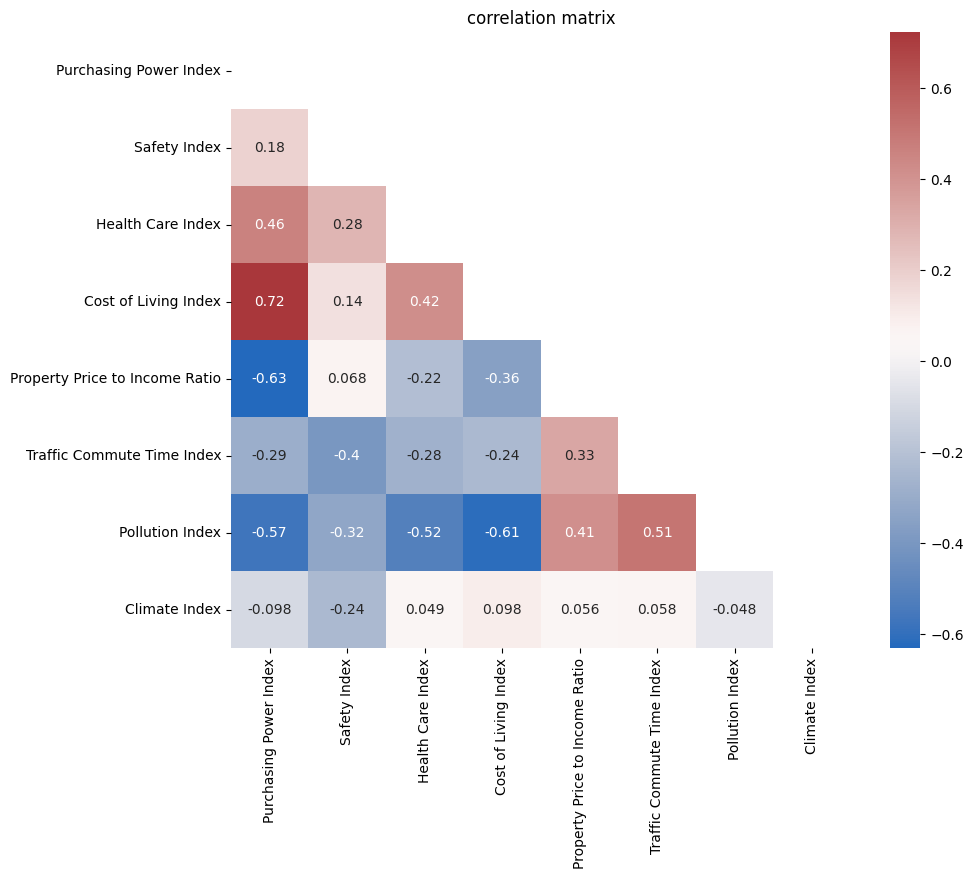

In [15]:
# 計算相關係數
corr_matrix = X1.corr()

# 只顯示一半的矩陣
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 繪製熱圖
plt.figure(figsize=(10, 8))  # 設定圖的大小
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="vlag")

# 設定標題
plt.title("correlation matrix")
plt.show()

相關係數為對稱矩陣，所以只須呈現一半即可。\
會發現變數 Cost of Living Index 、 Purchasing Power Index 和 Pollution Index 之間有高相關性。\
變數 Climate Index 和大多變數呈低相關性。

<hr>

(3)繪製一張含每個量測變數的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考

In [16]:
scaler = StandardScaler() # create a StandardScaler object
X1_std = scaler.fit_transform(X1) # standardize the data

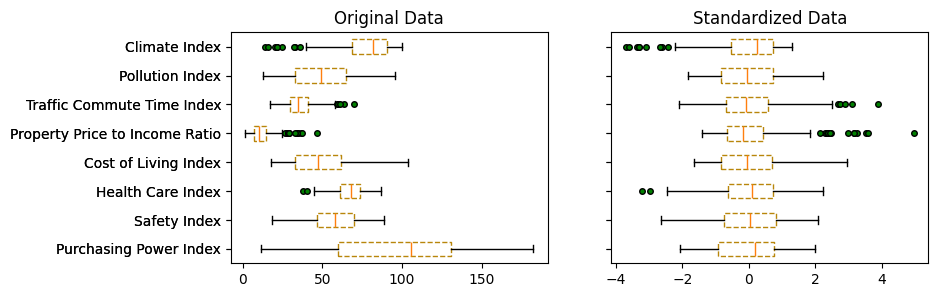

In [17]:
labels = X1.columns
fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey = True)
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 4, linestyle = 'none') 

# two boxplots share the same y-axis
ax[0].boxplot(X1, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = labels, vert = False)
ax[0].set_title('Original Data')

ax[1].boxplot(X1_std, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = labels, vert = False)
ax[1].set_title('Standardized Data')
plt.show()

因為變數間的尺度差異還是不小，所以需做標準化。如果不標準化，數值較大的變數可能會主導模型，影響結果的準確性。

<hr>

(4)進行主成分分析，繪製特徵值由大而小的分佈，如 scree plot 與累積百分比的 pareto plot。

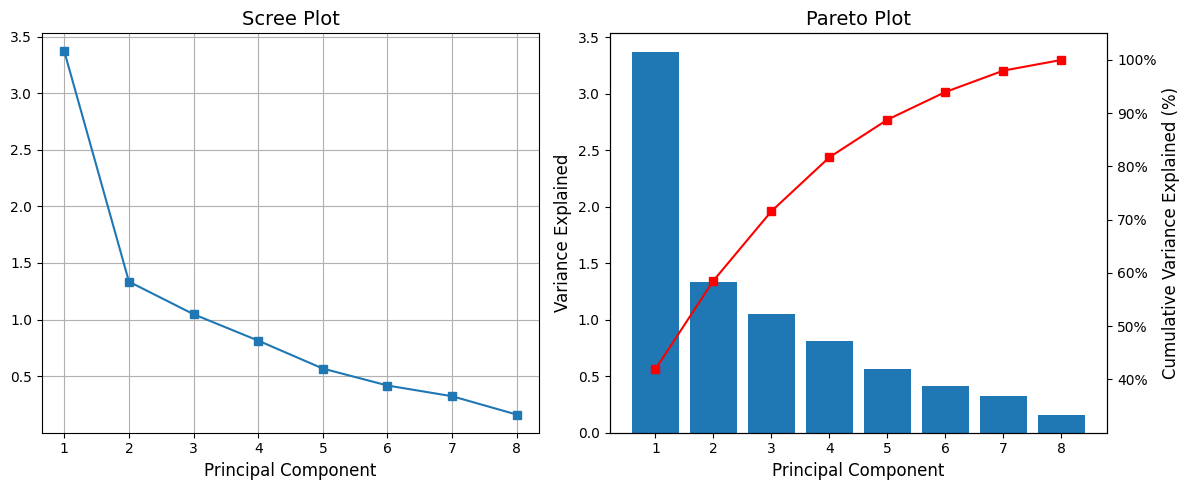

In [18]:
# 執行 PCA
pca = PCA()
pca.fit(X1_std)

# 取得特徵值（Eigenvalues）與累積解釋變異量
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)  # 累積變異量

# 設定畫布
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

### **Scree Plot（碎石圖）**
axes[0].plot(range(1, len(eigenvalues) + 1), eigenvalues,  marker="s", linestyle="-", color="tab:blue")
axes[0].set_xlabel("Principal Component", fontsize=12)
#axes[0].set_ylabel("Eigenvalue", fontsize=12)
axes[0].set_title("Scree Plot", fontsize=14)
axes[0].grid(True)

### **Pareto Plot（帕累托圖）**
ax1 = axes[1]
ax1.bar(range(1, len(eigenvalues) + 1), eigenvalues, color="tab:blue", label="Variance Explained")
ax1.set_xlabel("Principal Component", fontsize=12)
ax1.set_ylabel("Variance Explained", fontsize=12)
ax1.set_title("Pareto Plot", fontsize=14)

# 添加第二 y 軸（累積變異量）
ax2 = ax1.twinx()
ax2.plot(range(1, len(eigenvalues) + 1), cumulative_variance * 100, marker="s", linestyle="-", color="red", label="Cumulative Variance Explained")
ax2.set_ylabel("Cumulative Variance Explained (%)", fontsize=12)
ax2.set_ylim(30, 105)  # **設定 y 軸範圍**
ax2.set_yticks(np.arange(40, 110, 10))  # **設定 40%, 50%, 60%, ..., 100%**
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}%"))  # **加上 "%" 符號**

# 顯示圖表
plt.tight_layout()
plt.show()

主成分選擇依據 Scree Plot & Pareto Plot

1. 從 scree plot 中可看出在第 2 個主成分後，特徵值下降趨勢趨於平緩，這表示後續主成分對總變異的額外貢獻較小，依據肘部法則（Elbow Method），可考慮選擇前 1 到 2 個主成分。
2. 在 Pareto Plot 上，前 2 個主成分的累積方差解釋比例約為 60%，顯示這些主成分能夠保留相當比例的原始數據資訊，具備一定的解釋能力。

基於累積解釋變異數的主成分選擇

1. 從 Pareto Plot 來看，可以根據累積解釋變異數設定一個閾值（如 80% 以上），以確保所選主成分保留足夠資訊量。
2. 如果設定累積解釋變異數 ≥ 80%，則可選擇前 5 個主成分，因為它們共同解釋了數據的大部分變異。

<hr>

(5)每筆資料都有標籤值（label），代表生活品質的高低（3: HIGH, 2:MEDIUM, 1:LOW）。假設先不看這項標籤。利用主成分分析取得前兩項成分（$Z_1$ 與 $Z_2$），並繪製其散佈圖。是否可以從兩個主成分的散佈圖中看出兩個群組？

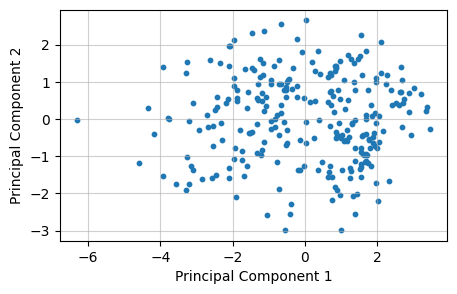

In [19]:
pca = PCA(n_components=2) # create a PCA object with 2 components
pca.fit(X1_std)
Z = pca.transform(X1_std)
# X_pca = pca.fit_transform(X_std)
eigenvalues = pca.explained_variance_
Z.shape
# draw a scater plot of the first two principal components
plt.figure(figsize=(5, 3))
plt.scatter(Z[:, 0], Z[:, 1], s=10, color='tab:blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle="-", alpha=0.6)  # 增加網格線
# plt.colorbar()
plt.show()

有標準化，但從這張圖看不出有明顯的分群。

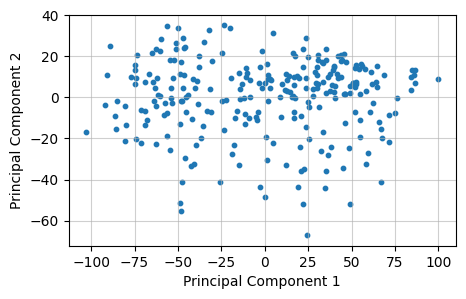

In [20]:
pca = PCA(n_components=2) # create a PCA object with 2 components
pca.fit(X1)  # 直接對原始數據 X 進行 PCA
Z = pca.transform(X1)  # 取得主成分投影

# 取得特徵值（解釋變異數）
eigenvalues = pca.explained_variance_

# 繪製散點圖
plt.figure(figsize=(5, 3))
plt.scatter(Z[:, 0], Z[:, 1], s=10, color='tab:blue')  
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle="-", alpha=0.6)  # 增加網格線
plt.show()

若無標準化，也看不出有明顯的分群。\
\
如果使用兩個主成分標準化與非標準化的 PCA 投影圖皆無法明顯分群，可能是因為：

1. 第一與第二主成分無法有效區分群組。
2. PCA 前幾個主成分的累積變異數不足（資訊量損失）。

<hr>

(5)再依據每筆資料的標籤（可以配以適當的文字，譬如 2 配置 HIGH），在散佈圖上塗上不同顏色。

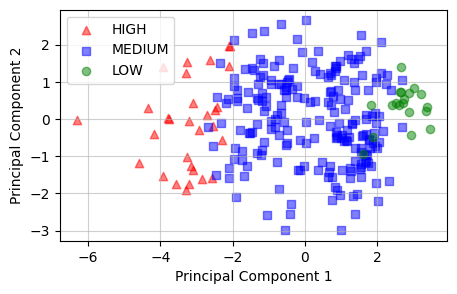

In [21]:
pca = PCA(n_components=2)
pca.fit(X1_std)
Z = pca.transform(X1_std)

# 定義不同類別的標記與顏色
colors = ['red', 'blue', 'green']
markers = ['^', 's', 'o']  # 三角形, 方形, 圓形
labels = ['HIGH', 'MEDIUM', 'LOW']

# 繪製散布圖
plt.figure(figsize=(5, 3))
for i, label in enumerate(np.unique(y1)):  
    plt.scatter(Z[y1 == label, 0], Z[y1 == label, 1], 
                color=colors[i], marker=markers[i], 
                label=labels[i], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 加入圖例
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle="-", alpha=0.6)  # 增加網格線
# plt.colorbar()
plt.show()

若上標記後，能看出其實是有分成三群的。

<hr>

(7)從 $Z_1$ 與 $Z_2$ 的散佈圖進一步推敲，也許需要加入 $Z_3$ 才能分得更好，又或許去除 $Z_2$ 僅取 $Z_1$ 也可以分得不錯。請提出你的看法。

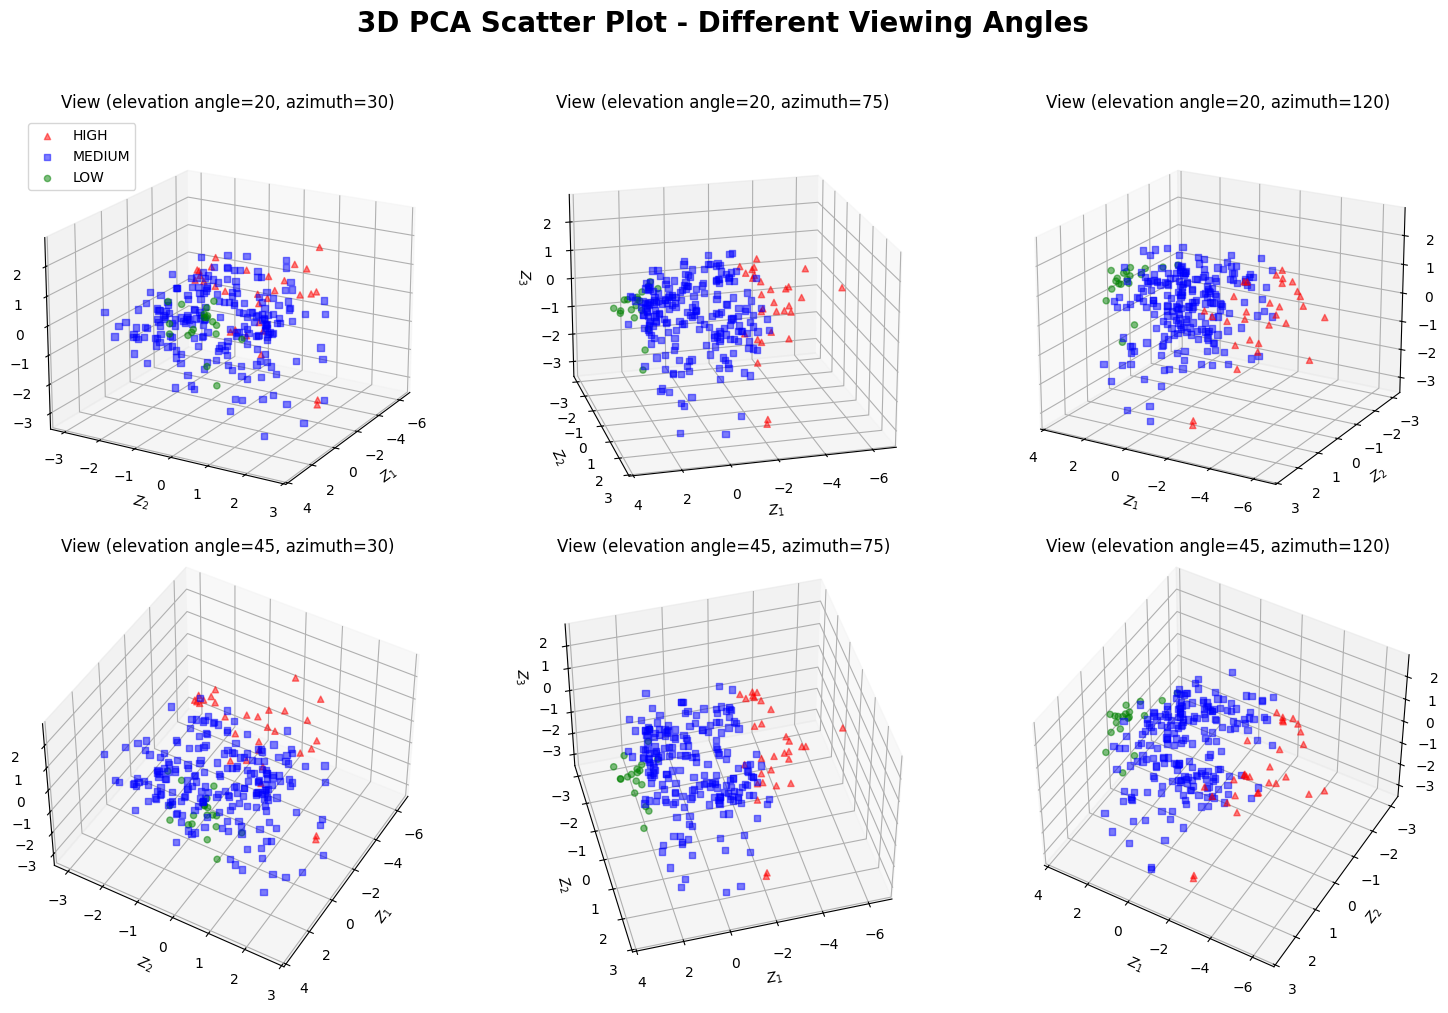

In [22]:
# 執行 PCA
pca = PCA(n_components=3)
pca.fit(X1_std)
Z = pca.transform(X1_std)

# 設定 6 種不同的視角
view_angles = [
    (20, 30),
    (20, 75),
    (20, 120),
    (45, 30),
    (45, 75),
    (45, 120)
]

# 建立 2x3 子圖
fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={"projection": "3d"})

# 設定大標題
fig.suptitle('3D PCA Scatter Plot - Different Viewing Angles', fontsize=20, fontweight='bold')

# 遍歷所有子圖 (axes.flat 讓 2x3 的子圖變成一維陣列) 並與視角 (elev, azim) 配對
for ax, (elev, azim) in zip(axes.flat, view_angles):
    # 遍歷數據集中所有不同的類別 (標籤 y)
    for i, label in enumerate(np.unique(y)):  
        ax.scatter(Z[y1 == label, 0], Z[y1 == label, 1], Z[y1 == label, 2], 
                   c=colors[i], marker=markers[i], 
                   label=labels[i], alpha=0.5)
    
    ax.set_xlabel(r'$Z_1$', fontsize=10)
    ax.set_ylabel(r'$Z_2$', fontsize=10)
    ax.set_zlabel(r'$Z_3$', fontsize=10)
    ax.set_title(f'View (elevation angle={elev}, azimuth={azim})', fontsize=12)
    
    # 設定不同角度
    ax.view_init(elev=elev, azim=azim)

# **只在第一個子圖加圖例**
axes.flat[0].legend(loc='upper left', fontsize=10)

# 調整圖形間距，避免標題與子圖重疊
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 讓 suptitle 有足夠空間
plt.show()

選取前三個主成分進行繪圖，並從六個不同角度觀察其分群效果。然而分群效果並未有顯著提升。

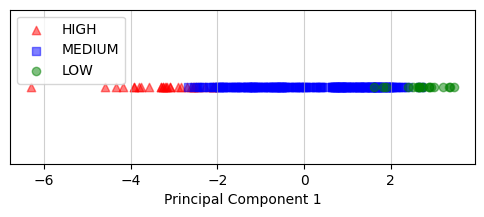

In [23]:
pca = PCA(n_components=2)
pca.fit(X1_std)
Z = pca.transform(X1_std)

# 定義不同類別的標記與顏色
colors = ['red', 'blue', 'green']
markers = ['^', 's', 'o']  # 三角形, 方形, 圓形
labels = ['HIGH', 'MEDIUM', 'LOW']

plt.figure(figsize=(6, 2))
for i, label in enumerate(np.unique(y1)):  
    plt.scatter(Z[y1 == label, 0],  # X 軸：PCA 第一主成分
                np.zeros_like(Z[y1 == label, 0]),  # Y 軸：全部設為 0
                color=colors[i], marker=markers[i], 
                label=labels[i], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.yticks([])  # 移除 Y 軸刻度，因為這是 1D 圖

# 加入圖例
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle="-", alpha=0.6)  # 增加網格線
# plt.colorbar()
plt.show()

改成僅使用第一個主成分進行繪圖，分群效果似乎較佳。\
綜合以上觀察，我認為使用單一主成分進行視覺化能夠展現最佳的分群效果。

<hr>

$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數（即前兩個 eigenvector 的值），看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。

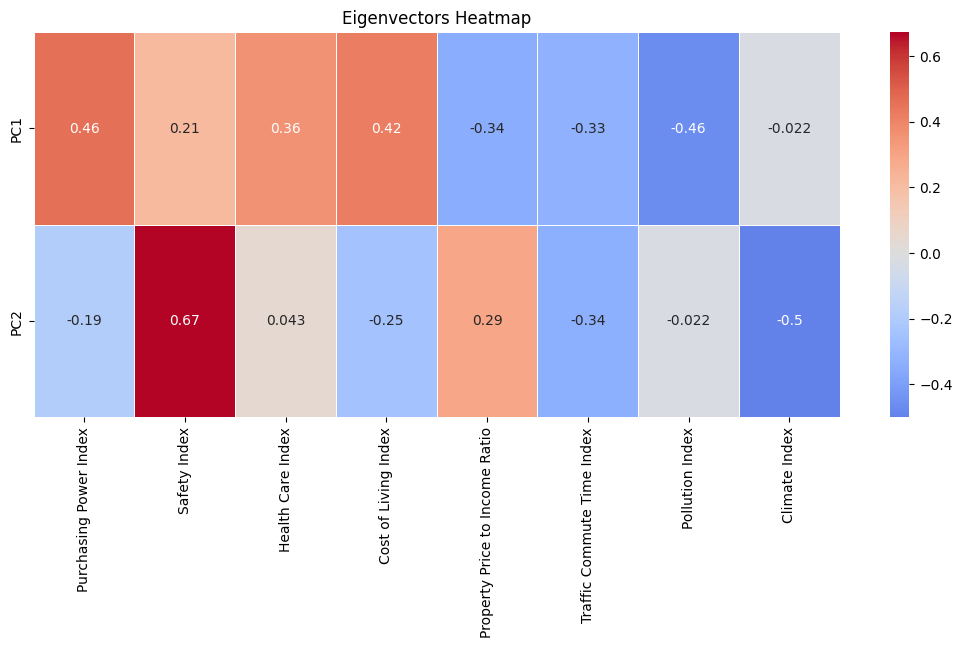

In [24]:
pca = PCA(n_components=2)
pca.fit(X1_std)
Z = pca.transform(X1_std)

# 取得前兩個主成分的 eigenvectors (loading matrix)
loadings = pca.components_  # shape: (2, n_features)

# 建立變數名稱
pc_names = [f"PC{i+1}" for i in range(loadings.shape[0])]

# 轉成 DataFrame 方便畫圖
loading_df = pd.DataFrame(loadings, index=pc_names, columns=X1.columns)

# 畫出 heatmap
plt.figure(figsize=(13, 5))
sns.heatmap(loading_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Eigenvectors Heatmap")
plt.show()

由該圖中，可以發現:
1. Purchasing Power Index 、 Pollution Index 和 Cost of Living Index 對PC1具有較高的重要性，而 Climate Index 對 PC1 的影響較小。\
表示 PC1 可能代表「經濟與生活成本」維度。
2. Safety Index 對 PC2 具有較高的重要性，而 Pollution Index 對 PC2 的影響較小。\
表示 PC2 可能代表「安全與社會環境」維度。

在原變數的相關係數圖中， Cost of Living Index 、 Purchasing Power Index 和 Pollution Index之間的相關性較高，而 Climate Index 與大多數其他變數的相關性較低，因此其所包含的資訊較為獨立。

以上證實 Eigenvectors Heatmap 與原變數間的相關係數圖透露相同的訊息，確實能找出數據的主要變異方向。